Topic:        **Benson Challenges** <br>
Subject:      Explore MTA turnstile data <br>
Date:         07/02/2019 <br>
Name:         Katherine Bell <br>


<h4>Section 1: Pandas<h4>

**C/A** – The Control Area is the operator booth in a station. Some stations only have one operator booth. However, larger stations may have more than one. <br /> <br /> 
**UNIT** – The Remote Unit, which is the collection of turnstiles. A station may have more than one Remote Unit.<br /> <br /> 
**STATION** -- Station name <br /> <br /> 
**SCP**– The Subunit Channel Position represents the turnstile and the number used may repeat across stations. The **UNIT** and **SCP** together is a unique identifier of a turnstile.<br /> <br /> 
**DATE** – The Date is the date of the recording with the format MM/DD/YYYY.<br /> <br /> 
**TIME** – The Time is the time for a recording, with the format: HH:MM:SS.<br /> <br /> 
**DESC** – The DESC is the type of event of the reading. The turnstiles submit “Regular” readings every four hours. They stagger the exact time of the readings across all the turnstiles and stations. Staggering the data submission times avoids having all the turnstiles update at simultaneously. “Recover Audit” designates scheduled readings taken after a communication outage. Our analysis uses “Regular” and “Recover Audit” readings. We discard other values such as “DoorClose” and “DoorOpen” which represent unscheduled maintenance readings. <br /> <br /> 
**ENTRIES** - The **ENTRIES** are a cumulative count of turnstile entrances. Note, the **ENTRIES** do not reset each day or for each recording period. The turnstile entry count continues to increase until it reaches the device limit and then resets to zero.<br /><br />
**EXITS** - The **EXITS** are a cumulative count of the turnstile exits.

[A very useful article for MTA Turnstile analysis.](http://transitdatatoolkit.com/lessons/subway-turnstile-data/)


In [9]:
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt
import itertools



In [ ]:
# -  import Mar - Jun Months from MTA site 2016-2019

# - faster version - create csvs

# more concise construction of date_combo  
date_list = [range(16,20), range(3,7),range(1,32)]
date_combo = [sub_list for sub_list in itertools.product(*date_list)]

url_lead = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
url_list = []
dfs = []

# - this checks the url is valid and adds them to a list
for year, month, day in date_combo:
    # year, month, day are integers
    # so we use f string here
    concat_url = f'{url_lead}{year}{month:02}{day:02}.txt'

    response = requests.get(concat_url)
    if response.status_code == 200:
        url_list.append(concat_url)

        # append to dfs and save csv
        dfs.append(pd.read_csv(concat_url, header = 0, sep = ','))
        dfs[-1].to_csv(f'/Users/kathmbell/Documents/Metis-Bootcamp/GitHub/{year}{month:02}{day:02}.csv')

# # we don't need to request the txt files again:
df = pd.concat(dfs, ignore_index = True)
df.to_csv(r'/Users/kathmbell/Documents/Metis-Bootcamp/GitHub/seasonal_mta_data_01.csv')








In [3]:
# - challenge 1

# - load data
# url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt'
# df = pd.read_csv(url, header = 0, sep=',')
# df.head()



,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [4]:
# - clean column names
# - make headers lowercase
df.columns = df.columns.str.strip().str.lower() 


In [5]:
sort_on_turnstiles = df.set_index(['c/a','unit','scp','station']).sort_index()
sort_on_turnstiles

linename division        date      time  \
c/a   unit scp      station                                                 
A002  R051 02-00-00 59 ST          NQR456W      BMT  06/22/2019  00:00:00   
                    59 ST          NQR456W      BMT  06/22/2019  04:00:00   
                    59 ST          NQR456W      BMT  06/22/2019  08:00:00   
                    59 ST          NQR456W      BMT  06/22/2019  12:00:00   
                    59 ST          NQR456W      BMT  06/22/2019  16:00:00   
                    59 ST          NQR456W      BMT  06/22/2019  20:00:00   
                    59 ST          NQR456W      BMT  06/23/2019  00:00:00   
                    59 ST          NQR456W      BMT  06/23/2019  04:00:00   
                    59 ST          NQR456W      BMT  06/23/2019  08:00:00   
                    59 ST          NQR456W      BMT  06/23/2019  12:00:00   
                    59 ST          NQR456W      BMT  06/23/2019  16:00:00   
                    59 ST          NQR456W      BMT  06/23/2019  20:00:00   
                    59 ST          NQR456W      BMT  06/24/2019  00:00:00   
                    59 ST          NQR456W      BMT  06/24/2019  04:00:00   
                    59 ST          NQR456W      BMT  06/24/2019  08:00:00   
                    59 ST          NQR456W      BMT  06/24/2019  12:00:00   
                    59 ST          NQR456W      BMT  06/24/2019  16:00:00   
                    59 ST          NQR456W      BMT  06/24/2019  20:00:00   
                    59 ST          NQR456W      BMT  06/25/2019  00:00:00   
                    59 ST          NQR456W      BMT  06/25/2019  04:00:00   
                    59 ST          NQR456W      BMT  06/25/2019  08:00:00   
                    59 ST          NQR456W      BMT  06/25/2019  12:00:00   
                    59 ST          NQR456W      BMT  06/25/2019  16:00:00   
                    59 ST          NQR456W      BMT  06/25/2019  20:00:00   
                    59 ST          NQR456W      BMT  06/26/2019  00:00:00   
                    59 ST          NQR456W      BMT  06/26/2019  04:00:00   
                    59 ST          NQR456W      BMT  06/26/2019  08:00:00   
                    59 ST          NQR456W      BMT  06/26/2019  12:00:00   
                    59 ST          NQR456W      BMT  06/26/2019  16:00:00   
                    59 ST          NQR456W      BMT  06/26/2019  20:00:00   
...                                    ...      ...         ...       ...   
TRAM2 R469 00-05-01 RIT-ROOSEVELT        R      RIT  06/24/2019  01:00:00   
                    RIT-ROOSEVELT        R      RIT  06/24/2019  05:00:00   
                    RIT-ROOSEVELT        R      RIT  06/24/2019  09:00:00   
                    RIT-ROOSEVELT        R      RIT  06/24/2019  13:00:00   
                    RIT-ROOSEVELT        R      RIT  06/24/2019  17:00:00   
                    RIT-ROOSEVELT        R      RIT  06/24/2019  21:00:00   
                    RIT-ROOSEVELT        R      RIT  06/25/2019  01:00:00   
                    RIT-ROOSEVELT        R      RIT  06/25/2019  05:00:00   
                    RIT-ROOSEVELT        R      RIT  06/25/2019  09:00:00   
                    RIT-ROOSEVELT        R      RIT  06/25/2019  13:00:00   
                    RIT-ROOSEVELT        R      RIT  06/25/2019  17:00:00   
                    RIT-ROOSEVELT        R      RIT  06/25/2019  21:00:00   
                    RIT-ROOSEVELT        R      RIT  06/26/2019  01:00:00   
                    RIT-ROOSEVELT        R      RIT  06/26/2019  05:00:00   
                    RIT-ROOSEVELT        R      RIT  06/26/2019  09:00:00   
                    RIT-ROOSEVELT        R      RIT  06/26/2019  13:00:00   
                    RIT-ROOSEVELT        R      RIT  06/26/2019  17:00:00   
                    RIT-ROOSEVELT        R      RIT  06/26/2019  21:00:00   
                    RIT-ROOSEVELT        R      RIT  06/27/2019  01:00:00   
                    RIT-ROOSEV

In [6]:
# - challenge 2 

import datetime

# # - combine and convert time and date 
# - datetime has to convert a string-type
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))
df['time'] = pd.to_datetime(df['time'].astype(str))
df['date'] = pd.to_datetime(df['date'].astype(str))



In [7]:
# - challenge 3

# - what is n (in hours)?
n = 4

In [8]:
# - total number of passengers in a day PER TURNSTILE

# - total number of turnstile entrances 
# - difference between entrances from beginning to end of day
turnstile_entries_group_date = df.groupby(['date','c/a','unit','scp','station']
                                         )['entries'].apply(lambda x: x.max() - x.min()
                                                           ).reset_index()
turnstile_entries_group_date.dtypes


# - total entries by date
# turnstile_entries_group_date.groupby('date')['entries'].sum().reset_index()


date       datetime64[ns]
c/a                object
unit               object
scp                object
station            object
entries             int64
dtype: object

In [9]:
# - challenge 4

# - create a turnstile mask
# - choose your own adventure

turnstile_mask = (turnstile_entries_group_date['scp'] == '02-00-01'
                         ) &(turnstile_entries_group_date['station'] == '59 ST')

# - apply mask  
turnstile_entries_mask = turnstile_entries_group_date[turnstile_mask]

# - make var for plotting
turnstile_entries_plot = turnstile_entries_mask.drop(['c/a', 'unit', 'scp','station'], axis = 1)
turnstile_entries_plot



,date,entries
1,2019-06-22,586
4875,2019-06-23,435
9748,2019-06-24,1064
14620,2019-06-25,1100
19491,2019-06-26,1095
24365,2019-06-27,1117
29239,2019-06-28,1077


/Users/kathmbell/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


''

findfont: Font family ['monotype'] not found. Falling back to DejaVu Sans.


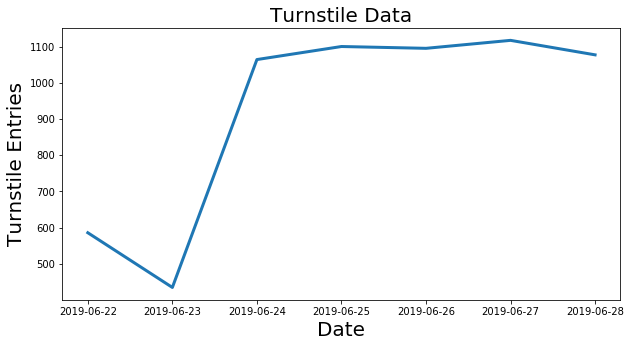

In [10]:
# - matplotlib weridness requires to change datatype

plt.figure(figsize = [10,5])
plt.plot(turnstile_entries_plot.date.astype('O')
         , turnstile_entries_plot.entries, linewidth = 3)
plt.title("Turnstile Data", family = 'monotype', fontsize = 20)
plt.xlabel("Date", family = 'monotype', fontsize = 20)
plt.xticks(x, rotation=30)
plt.ylabel("Turnstile Entries", family = 'monotype', fontsize = 20)
;

# - you can see that this is more of a weekday heavy turnstile

# - question for TAs - how to fix dates - 
# - https://matplotlib.org/3.1.0/gallery/recipes/common_date_problems.html

In [177]:
# - challenge 5

# - group by turnstile (as seen in the previous question)
# - total number of turnstile entrances 
# - difference between entrances from beginning to end of day

turnstile_entries_group_date

# - group by c/a, unit, station / sum entries
station_group_by = turnstile_entries_group_date.groupby(
    ['date', 'c/a', 'unit', 'station'])['entries'].sum()

 


date        c/a   unit  station   
2019-06-22  A002  R051  59 ST          5895
            A006  R079  5 AV/59 ST     6535
            A007  R079  5 AV/59 ST     3591
            A010  R080  57 ST-7 AV    10881
            A011  R080  57 ST-7 AV     6054
Name: entries, dtype: int64

In [219]:
# - challenge 6

# - total number of turnstile entrances 
# - difference between entrances from beginning to end of day
# - group by turnstile (as seen in the previous question)

turnstile_entries_group_date

# - combine everything in each station date, station

station_date_group = turnstile_entries_group_date.groupby(
    ['date','station'])['entries'].sum().reset_index()

station_date_group.tail()

,date,station,entries
2641,2019-06-28,WOODLAWN,6170
2642,2019-06-28,WORLD TRADE CTR,17523
2643,2019-06-28,WTC-CORTLANDT,13830
2644,2019-06-28,YORK ST,12327
2645,2019-06-28,ZEREGA AV,2419


In [235]:
# - challenge 7

# - use grouped station variable from challenge 6
# - create mask
station_date_group.head()
station_mask = station_date_group['station'] == 'WORLD TRADE CTR'

station_timeseries = station_date_group[station_mask]


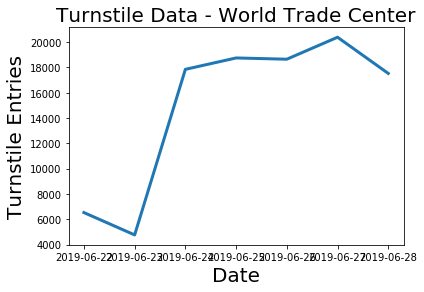

<Figure size 720x360 with 0 Axes>

In [234]:
# - plot

plt.plot(station_timeseries.date.astype('O')
         , station_timeseries.entries, linewidth = 3)
plt.title("Turnstile Data - World Trade Center",family = 'monotype', fontsize = 20)
plt.xlabel("Date", family = 'monotype', fontsize = 20)
plt.ylabel("Turnstile Entries", family = 'monotype', fontsize = 20)
plt.figure(figsize = [10,5]);

In [240]:
# - challenge 8

df['day_of_week'] = df['date'].dt.weekday_name


In [26]:
turnstile_exit_group = df.groupby(['c/a','unit','scp','station'])['exits'].apply(lambda x: x.max() - x.min()).reset_index()
station_exit_group = turnstile_exit_group.groupby('station')['exits'].sum().sort_values(0,False)


KeyError: 'c/a'

In [ ]:
station_min_max = df.groupby(['c/a','unit','scp','station'])['exits'])

In [ ]:
# -- Appendix


# date_list = [['16', '17', '18', '19'],['03', '04', '05', '06'],['01', '02', '03', '03', '04', '05', '06'
#        ,'07', '08', '09','10', '11', '12','13','14' ,'15', '16',
#        '17','18','19','20','21','22','23','24','25','26','27'
#        ,'28','29','30','31']]
# date_combo = []

# # - create year - month - date combos
# # - link: https://stackoverflow.com/questions/798854/all-combinations-of-a-list-of-lists

# for sub_list in itertools.product(*date_list):
#     date_combo.append(sub_list)

# url_lead = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
# url_list = []

# # - this checks the url is valid and adds them to a list
# for year, month, day in date_combo:
#     concat_url = url_lead + year + month + day + '.txt'
#     response = requests.get(concat_url)
#     if response.status_code == 200:
# # ---- creates a list of active urls
#         url_list.append(concat_url)
# # ---- this creates individual csvs ---- change path for saving locally
# # ---- filename is date
#         df = pd.read_csv(concat_url, header = 0, sep = ',')
#         df.to_csv(r'/Users/kathmbell/Documents/Metis-Bootcamp/GitHub/' + year + month + day + '.csv')

# # - this creates a master df for all urls
# dfs = [pd.read_csv(url,header = 0, sep = ',') for url in url_list]
# df = pd.concat(dfs, ignore_index = True)
# df.to_csv(r'/Users/kathmbell/Documents/Metis-Bootcamp/GitHub/seasonal_mta_data_01.csv')